C:\Users\reshm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1435: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


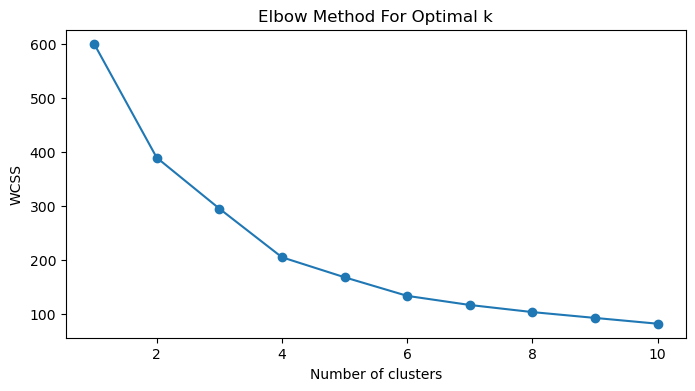

Cluster Centers:
          Age  Annual Income (k$)  Spending Score (1-100)
0  46.250000           26.750000               18.350000
1  25.185185           41.092593               62.240741
2  32.875000           86.100000               81.525000
3  39.871795           86.102564               19.358974
4  55.638298           54.382979               48.851064


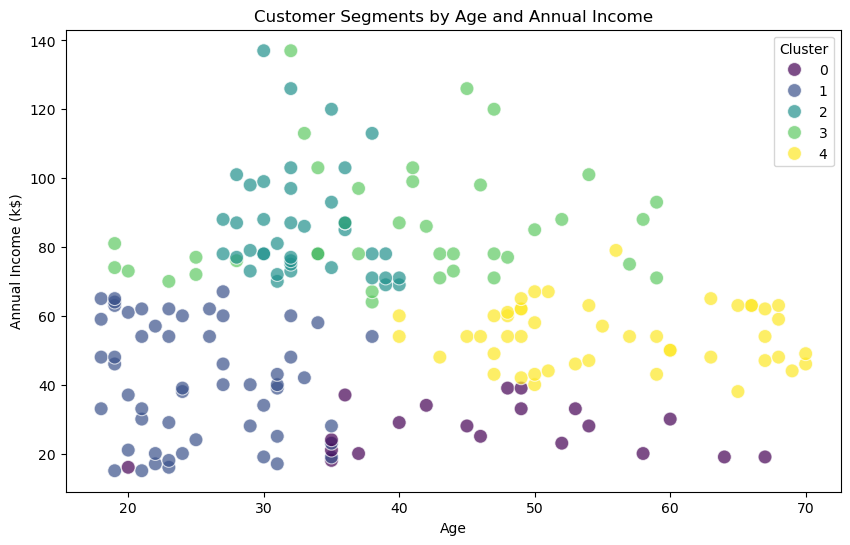

In [7]:
import os
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# ---- FIX: Avoid MKL memory leak warning on Windows ----
os.environ["OMP_NUM_THREADS"] = "1"
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn.cluster._kmeans')

# Load dataset
df = pd.read_csv("Mall_Customers.csv")

# Clean up column names to prevent typos
df.columns = df.columns.str.strip().str.replace('–', '-', regex=False)  # replace en dash
df.columns = df.columns.str.replace('\u2013', '-', regex=False)         # replace Unicode en dash
df.columns = df.columns.str.replace('\u2014', '-', regex=False)         # replace em dash
df.columns = df.columns.str.strip()

# Encode Gender column
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Select features
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Find optimal clusters (Elbow Method)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(
        n_clusters=i, init='k-means++',
        max_iter=300, n_init=10,
        algorithm='elkan',  # FIX: stable for small datasets
        random_state=42
    )
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Train KMeans with chosen k
k = 5
kmeans = KMeans(
    n_clusters=k, init='k-means++',
    max_iter=300, n_init=10,
    algorithm='elkan',
    random_state=42
)
y_kmeans = kmeans.fit_predict(X_scaled)

# Add cluster labels
df['Cluster'] = y_kmeans

# Show cluster centers
centers = scaler.inverse_transform(kmeans.cluster_centers_)
centers_df = pd.DataFrame(centers, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
print("Cluster Centers:\n", centers_df)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Age', y='Annual Income (k$)',
    hue='Cluster', palette='viridis',
    data=df, s=100, alpha=0.7
)
plt.title('Customer Segments by Age and Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend(title='Cluster')
plt.show()

